In [1]:
import os
import numpy as np
import pickle
from matplotlib import pyplot as plt

from tqdm import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F

from Week567_General_Code_Question import load_mnist

In [2]:
batch_size = 128
train_loader, test_loader = load_mnist(batch_size=batch_size)
mnist_dim = 28 * 28
z_dim = 64

In [3]:
class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, output_dim),
            nn.Tanh()
        )

    def forward(self, x):
        return self.main(x)

class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.main(x)

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
G = Generator(z_dim, mnist_dim).to(device)
D = Discriminator(mnist_dim).to(device)
print(G, D)

Generator(
  (main): Sequential(
    (0): Linear(in_features=64, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
) Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=256, out_features=1, bias=True)
    (5): Sigmoid()
  )
)


In [5]:
lr = 0.0002
criterion = nn.BCELoss()
G_optimizer = torch.optim.Adam(G.parameters(), lr=lr)
D_optimizer = torch.optim.Adam(D.parameters(), lr=lr)
G_loss_history = []
D_loss_history = []

In [6]:
def show():
    G.eval()
    G_gen = G(torch.randn((10, z_dim), device=device))
    imgs = G_gen.detach().cpu().data.numpy().reshape(G_gen.shape[0], 28, 28)

    fig = plt.figure(figsize=(8, 3))
    for idx, img in enumerate(imgs):
        ax = fig.add_subplot(2, 5, idx + 1)
        ax.imshow(img, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

Epoch 1/100:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 1: D_loss 0.5166, G_loss 2.1655


Epoch 2: D_loss 0.6776, G_loss 0.7921


Epoch 3: D_loss 0.6062, G_loss 1.0706


Epoch 4: D_loss 0.6805, G_loss 1.3287


Epoch 5: D_loss 0.7285, G_loss 2.0572


Epoch 6: D_loss 0.5804, G_loss 1.3242


Epoch 7: D_loss 0.5365, G_loss 1.1953


Epoch 8: D_loss 0.6493, G_loss 1.0767


Epoch 9: D_loss 0.5707, G_loss 1.0649


Epoch 10: D_loss 0.6249, G_loss 1.0636


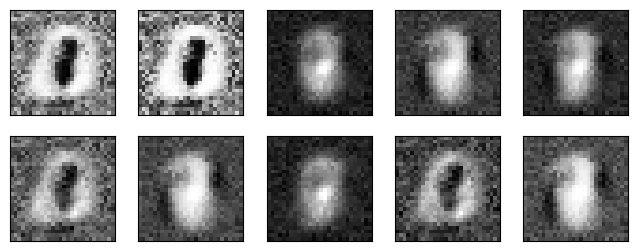

Epoch 11: D_loss 0.6338, G_loss 1.2198


Epoch 12: D_loss 0.5801, G_loss 1.2280


Epoch 13: D_loss 0.5758, G_loss 1.1737


Epoch 14: D_loss 0.5887, G_loss 1.2608


Epoch 15: D_loss 0.6013, G_loss 1.1886


Epoch 16: D_loss 0.6100, G_loss 1.2887


Epoch 17: D_loss 0.5843, G_loss 1.2798


Epoch 18: D_loss 0.6130, G_loss 1.3209


Epoch 19: D_loss 0.6245, G_loss 1.0800


Epoch 20: D_loss 0.6034, G_loss 1.2098


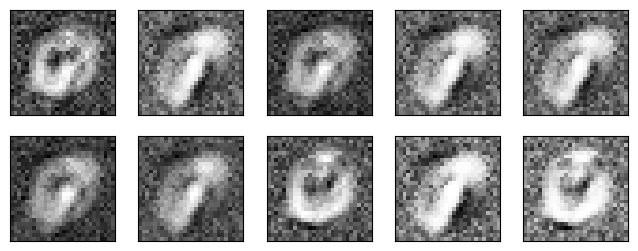

Epoch 21: D_loss 0.5637, G_loss 1.1420


Epoch 22: D_loss 0.5805, G_loss 1.2249


Epoch 23: D_loss 0.6030, G_loss 1.1659


Epoch 24: D_loss 0.5797, G_loss 1.1903


Epoch 25: D_loss 0.6267, G_loss 1.3296


Epoch 26: D_loss 0.6008, G_loss 1.2523


Epoch 27: D_loss 0.5863, G_loss 1.2501


Epoch 28: D_loss 0.5636, G_loss 1.1657


Epoch 29: D_loss 0.6114, G_loss 1.1409


Epoch 30: D_loss 0.6182, G_loss 1.1422


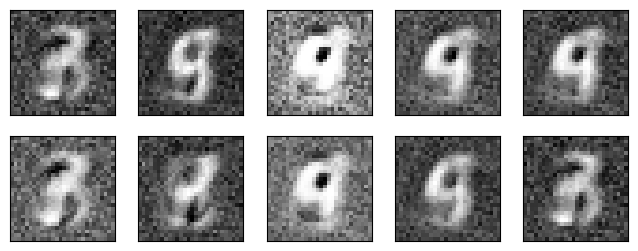

Epoch 31: D_loss 0.5876, G_loss 1.2111


Epoch 32: D_loss 0.5734, G_loss 1.2303


Epoch 33: D_loss 0.5922, G_loss 1.2886


Epoch 34: D_loss 0.5926, G_loss 1.2270


Epoch 35: D_loss 0.6110, G_loss 1.1035


Epoch 36: D_loss 0.6216, G_loss 1.1960


Epoch 37: D_loss 0.5837, G_loss 1.2165


Epoch 38: D_loss 0.6232, G_loss 1.1799


Epoch 39: D_loss 0.5665, G_loss 1.2004


Epoch 40: D_loss 0.6095, G_loss 1.1621


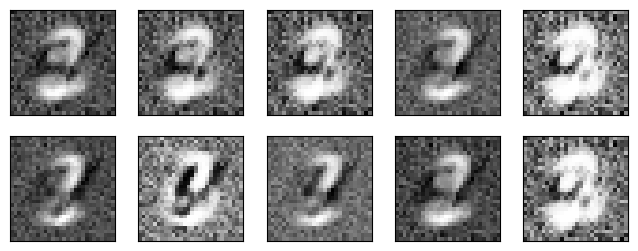

Epoch 41: D_loss 0.5667, G_loss 1.3194


Epoch 42: D_loss 0.5837, G_loss 1.1634


Epoch 43: D_loss 0.6003, G_loss 1.2889


Epoch 44: D_loss 0.5519, G_loss 1.2441


Epoch 45: D_loss 0.6207, G_loss 1.2823


Epoch 46: D_loss 0.5833, G_loss 1.2012


Epoch 47: D_loss 0.5864, G_loss 1.1896


Epoch 48: D_loss 0.5805, G_loss 1.1942


Epoch 49: D_loss 0.6106, G_loss 1.1984


Epoch 50: D_loss 0.5730, G_loss 1.1934


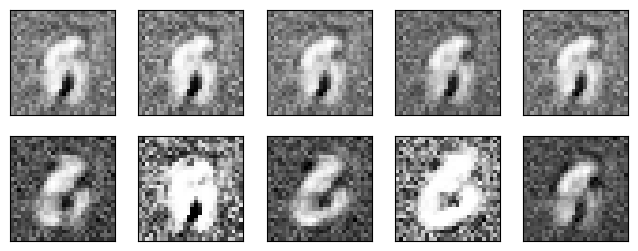

Epoch 51: D_loss 0.6142, G_loss 1.2122


Epoch 52: D_loss 0.5720, G_loss 1.1677


Epoch 53: D_loss 0.5729, G_loss 1.2486


Epoch 54: D_loss 0.5455, G_loss 1.2593


Epoch 55: D_loss 0.6089, G_loss 1.2384


Epoch 56: D_loss 0.5563, G_loss 1.2511


Epoch 57: D_loss 0.5812, G_loss 1.3202


Epoch 58: D_loss 0.5543, G_loss 1.2653


Epoch 59: D_loss 0.5643, G_loss 1.2915


Epoch 60: D_loss 0.5406, G_loss 1.3274


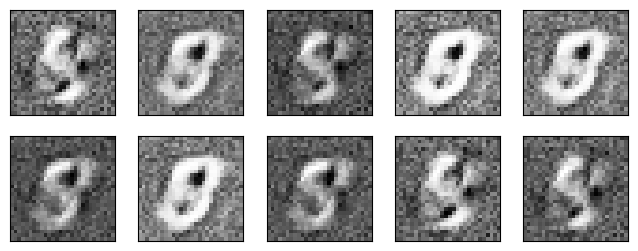

Epoch 61: D_loss 0.5626, G_loss 1.2952


Epoch 62: D_loss 0.5531, G_loss 1.3009


Epoch 63: D_loss 0.5581, G_loss 1.3672


Epoch 64: D_loss 0.5535, G_loss 1.3661


Epoch 65: D_loss 0.5348, G_loss 1.3969


Epoch 66: D_loss 0.5436, G_loss 1.2889


Epoch 67: D_loss 0.5196, G_loss 1.4252


Epoch 68: D_loss 0.5423, G_loss 1.3860


Epoch 69: D_loss 0.5902, G_loss 1.3460


Epoch 70: D_loss 0.5486, G_loss 1.3914


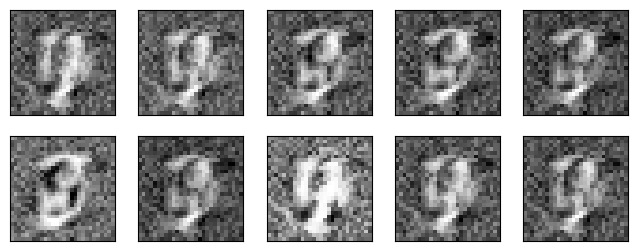

Epoch 71: D_loss 0.5371, G_loss 1.3430


Epoch 72: D_loss 0.5806, G_loss 1.3410


Epoch 73: D_loss 0.5120, G_loss 1.3634


Epoch 74: D_loss 0.5317, G_loss 1.3668


Epoch 75: D_loss 0.5595, G_loss 1.3848


Epoch 76: D_loss 0.5333, G_loss 1.4974


Epoch 77: D_loss 0.5587, G_loss 1.2504


Epoch 78: D_loss 0.5292, G_loss 1.3960


Epoch 79: D_loss 0.5208, G_loss 1.5543


Epoch 80: D_loss 0.5464, G_loss 1.3785


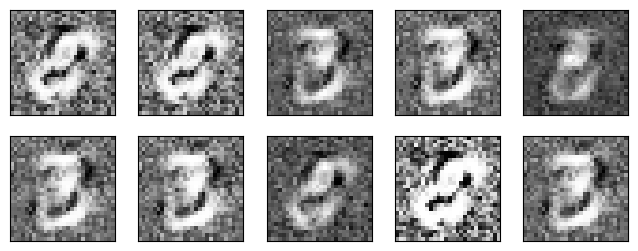

Epoch 81: D_loss 0.5105, G_loss 1.3961


Epoch 82: D_loss 0.5238, G_loss 1.4338


Epoch 83: D_loss 0.5042, G_loss 1.4859


Epoch 84: D_loss 0.5552, G_loss 1.4120


Epoch 85: D_loss 0.5286, G_loss 1.4424


Epoch 86: D_loss 0.5355, G_loss 1.3725


Epoch 87: D_loss 0.5176, G_loss 1.4712


Epoch 88: D_loss 0.4904, G_loss 1.6906


Epoch 89: D_loss 0.5168, G_loss 1.4085


Epoch 90: D_loss 0.5103, G_loss 1.4327


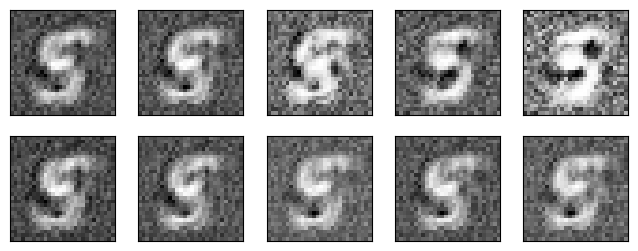

Epoch 91: D_loss 0.4899, G_loss 1.5829


Epoch 92: D_loss 0.5032, G_loss 1.4739


Epoch 93: D_loss 0.5217, G_loss 1.4550


Epoch 94: D_loss 0.5299, G_loss 1.4752


Epoch 95: D_loss 0.5378, G_loss 1.4563


Epoch 96: D_loss 0.5288, G_loss 1.4169


Epoch 97: D_loss 0.4746, G_loss 1.5341


Epoch 98: D_loss 0.5172, G_loss 1.5475


Epoch 99: D_loss 0.4939, G_loss 1.6256


Epoch 100: D_loss 0.4928, G_loss 1.5403


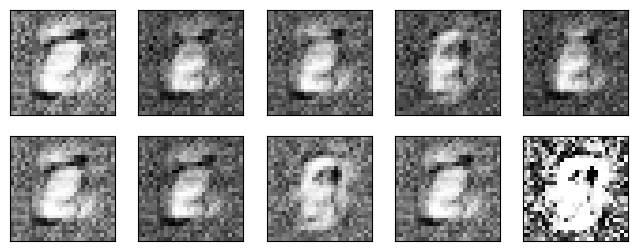

In [7]:
epochs = 100
for epoch in range(epochs):
    D_loss_avg, G_loss_avg = 0.0, 0.0
    for real_images, _ in tqdm(train_loader, desc=f'Epoch {epoch+1}/{epochs}', leave=False):
        batch_size = real_images.size(0)
        real_images = real_images.view(-1, mnist_dim).to(device)

        # Train Discriminator
        D_optimizer.zero_grad()
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        z = torch.randn(batch_size, z_dim).to(device)
        fake_images = G(z)

        D_loss_real = criterion(D(real_images), real_labels)
        D_loss_fake = criterion(D(fake_images.detach()), fake_labels)
        D_loss = (D_loss_real + D_loss_fake) / 2

        D_loss.backward()
        D_optimizer.step()

        # Train Generator
        G_optimizer.zero_grad()
        G_loss = criterion(D(fake_images), real_labels)

        G_loss.backward()
        G_optimizer.step()

        D_loss_avg += D_loss.item()
        G_loss_avg += G_loss.item()

        D_loss_history.append(D_loss.item())
        G_loss_history.append(G_loss.item())

    print(f'Epoch {epoch+1}: D_loss {D_loss_avg/len(train_loader):.4f}, G_loss {G_loss_avg/len(train_loader):.4f}')

    if (epoch + 1) % 10 == 0:
        show()

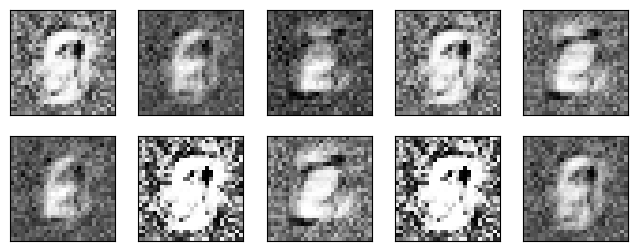

In [8]:
G.eval()
G_gen = G(torch.randn((10, z_dim), device=device))
imgs = G_gen.detach().cpu().data.numpy().reshape(G_gen.shape[0], 28, 28)

fig = plt.figure(figsize=(8, 3))
for idx, img in enumerate(imgs):
    ax = fig.add_subplot(2, 5, idx + 1)
    ax.imshow(img, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

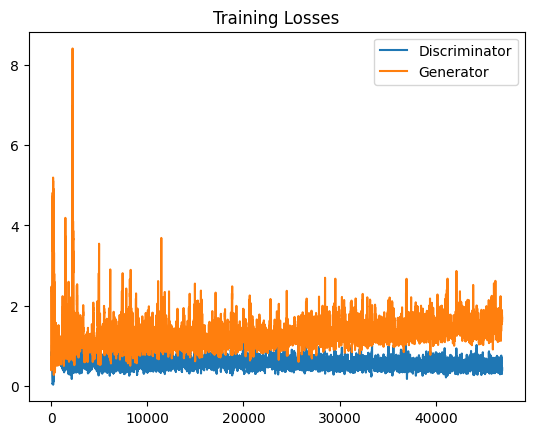

In [9]:
fig, ax = plt.subplots()
plt.plot(np.array(D_loss_history), label='Discriminator')
plt.plot(np.array(G_loss_history), label='Generator')
plt.title("Training Losses")
plt.legend()
plt.show()